In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("Hours and Scores.csv")
X = df['Hours'].values
y = df['Scores'].values

# Analyzing Data

In [4]:
df.head()

,Unnamed: 0,Hours,Scores
0,"2.5,21",2.5,21
1,"5.1,47",5.1,47
2,"3.2,27",3.2,27
3,"8.5,75",8.5,75
4,"3.5,30",3.5,30


In [5]:
print("shape:",df.shape)

shape: (25, 3)


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  25 non-null     object 
 1   Hours       25 non-null     float64
 2   Scores      25 non-null     int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 732.0+ bytes


In [7]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [8]:
print("Missing values:\n",df.isnull().sum()) #No missing Values

Missing values:
 Unnamed: 0    0
Hours         0
Scores        0
dtype: int64


In [9]:
print("Columns: ",df.columns.tolist())

Columns:  ['Unnamed: 0', 'Hours', 'Scores']


# Data Visualization

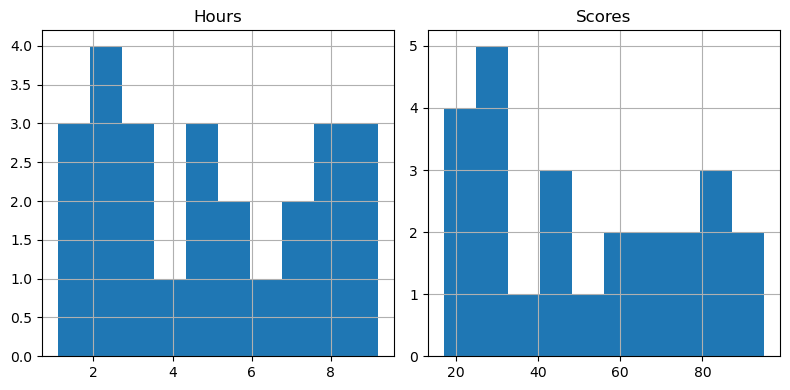

In [10]:
df.hist(figsize=(8,4),bins = 10)
plt.tight_layout()
plt.show()

# Scatter Plot

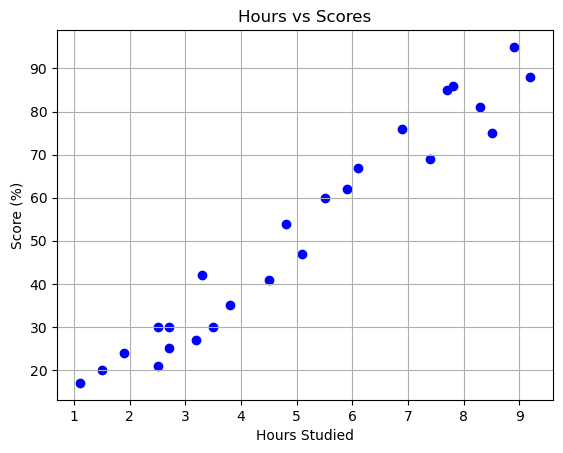

In [11]:
plt.scatter(df['Hours'],df['Scores'],color = 'blue')
plt.title('Hours vs Scores')
plt.xlabel('Hours Studied')
plt.ylabel('Score (%)')
plt.grid(True) # makes grid
plt.show()

## 1. The dataset has 25 entries and 2 columns: "Hours" and "Scores".
2. There are no missing values in the dataset.
3. The correlation coefficient between Hours and Scores is close to 1, indicating a strong positive linear relationship.
4. The scatter plot shows a clear linear trend — the more hours studied, the higher the score.
5. There are no significant outliers in either Hours or Scores based on the boxplot.


# Training

In [12]:
# Cost Function
def compute_cost(x,y,w,b):
    m = X.shape[0]
    cost = 0.0
    for i in range(m):
        f_wb = w*X[i]+b
        cost+=(f_wb - y[i])**2
    return cost/(2*m)

In [13]:
# Gradient Descent
def compute_gradient(X, y, w, b):
    m = X.shape[0]
    dj_dw = 0.0
    dj_db = 0.0
    for i in range(m):
        f_wb = w * X[i] + b
        error = f_wb - y[i]
        dj_dw += error * X[i]
        dj_db += error
    dj_dw /= m
    dj_db /= m
    return dj_dw, dj_db

In [14]:
def gradient_descent(X, y, w_in, b_in, alpha, num_iters, tolerance=1e-4):
    w = w_in
    b = b_in
    J_history = []

    for i in range(num_iters):
        dj_dw, dj_db = compute_gradient(X, y, w, b)

        w = w - alpha * dj_dw
        b = b - alpha * dj_db

        cost = compute_cost(X, y, w, b)
        J_history.append(cost)

        # Print every 100th iteration or the last one
        if i % 100 == 0 or i == num_iters - 1:
            print(f"Iteration {i}: Cost={cost:.4f}, w={w:.4f}, b={b:.4f}")

        # Early stopping after the first iteration
        if i > 0:
            cost_change = abs(J_history[i] - J_history[i-1])
            if cost_change < tolerance:
                print(f"Converged at iteration {i}, cost change: {cost_change:.8f}")
                break

    return w, b, J_history


In [15]:
w_init = 0
b_init = 0
iterations = 1000
alpha = 0.001

w_final, b_final, J_hist = gradient_descent(X, y, w_init, b_init, alpha, iterations)
print(f"\nFinal parameters: w = {w_final:.2f}, b = {b_final:.2f}")


Iteration 0: Cost=1529.9989, w=0.3179, b=0.0515
Iteration 100: Cost=16.7593, w=9.5461, b=1.5582
Iteration 200: Cost=14.5154, w=9.8987, b=1.6319
Converged at iteration 218, cost change: 0.00009609

Final parameters: w = 9.90, b = 1.64


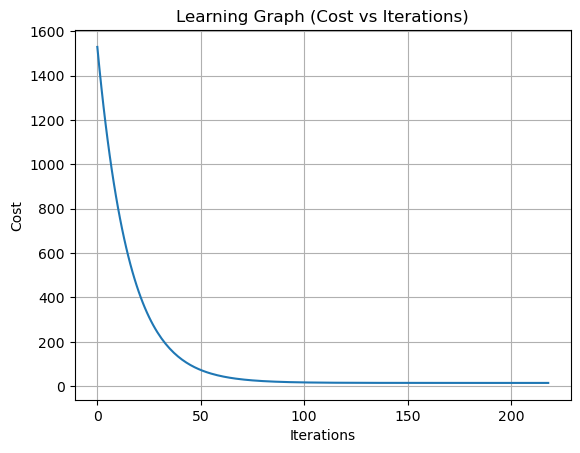

In [16]:
# --- Learning Curve ---
plt.plot(J_hist)
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.title("Learning Graph (Cost vs Iterations)")
plt.grid(True)
plt.show()

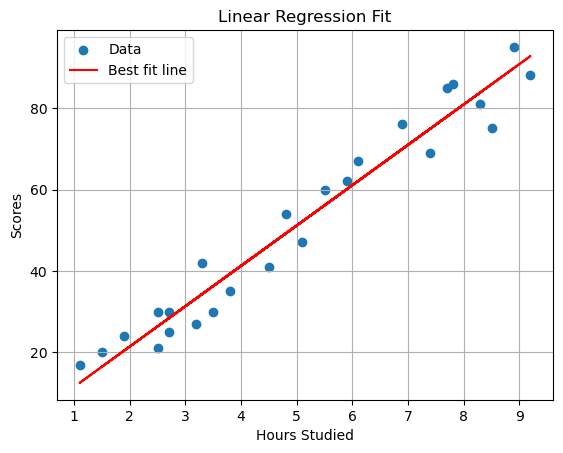

In [17]:
plt.scatter(X, y, label='Data')
plt.plot(X, w_final * X + b_final, color='red', label='Best fit line')
plt.xlabel("Hours Studied")
plt.ylabel("Scores")
plt.title("Linear Regression Fit")
plt.grid(True)
plt.legend()
plt.show()


# Prediction

In [18]:
def predict_score(hours, w, b):
    return w * hours + b

In [19]:
# Example predictions
hours_list = [5, 9]

for h in hours_list:
    predicted = predict_score(h, w_final, b_final)
    print(f"Predicted score for studying {h} hours = {predicted:.2f}")


Predicted score for studying 5 hours = 51.16
Predicted score for studying 9 hours = 90.78


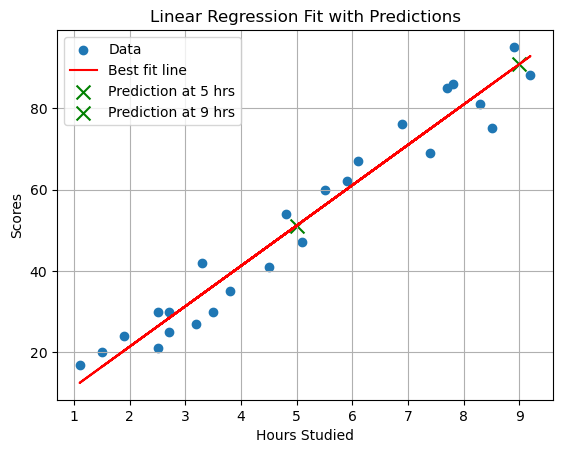

In [20]:
# Original data and best fit line
plt.scatter(X, y, label='Data')
plt.plot(X, w_final * X + b_final, color='red', label='Best fit line')

# Predicted points
for h in hours_list:
    pred = predict_score(h, w_final, b_final)
    plt.scatter(h, pred, color='green', marker='x', s=100, label=f'Prediction at {h} hrs')

plt.xlabel("Hours Studied")
plt.ylabel("Scores")
plt.title("Linear Regression Fit with Predictions")
plt.grid(True)
plt.legend()
plt.show()


In [22]:
# Suppose x and y are your data
# m and b are your slope and intercept from manual calculation
# y_pred = [m * xi + b for xi in x]

# Calculate R²
# ss_res = sum((yi - ypi) ** 2 for yi, ypi in zip(y, y_pred))  # Residual sum of squares
# ss_tot = sum((yi - sum(y)/len(y)) ** 2 for yi in y)           # Total sum of squares
# r2 = 1 - (ss_res / ss_tot)

# print("R² score:", r2)


# Predicted Using Linear_Regression